# Pregunta 5

Se lee el archivo AFP, que contiene los datos de las distinas AFP

In [2]:
install.packages("astsa")
install.packages("fGarch")


  There is a binary version available but the source version is later:
      binary source needs_compilation
astsa   1.11   1.12             FALSE



installing the source package 'astsa'

also installing the dependency 'fastICA'



package 'fastICA' successfully unpacked and MD5 sums checked
package 'fGarch' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pily1\AppData\Local\Temp\RtmpYTv555\downloaded_packages


In [6]:

library(astsa)
library(quantmod)
library('fGarch')

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
Warning message:
"package 'fGarch' was built under R version 3.6.3"Loading required package: timeDate
Loading required package: timeSeries
Warning message:
"package 'timeSeries' was built under R version 3.6.3"
Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-

Loading required package: fBasics
Warning message:
"package 'fBasics' was built under R version 3.6.3"
Attaching package: 'fBasics'

The following object is masked from 'package:TTR':

    volatility

The following object is masked from 'package:astsa':


#### Graficando la serie

In [12]:
datax=sales

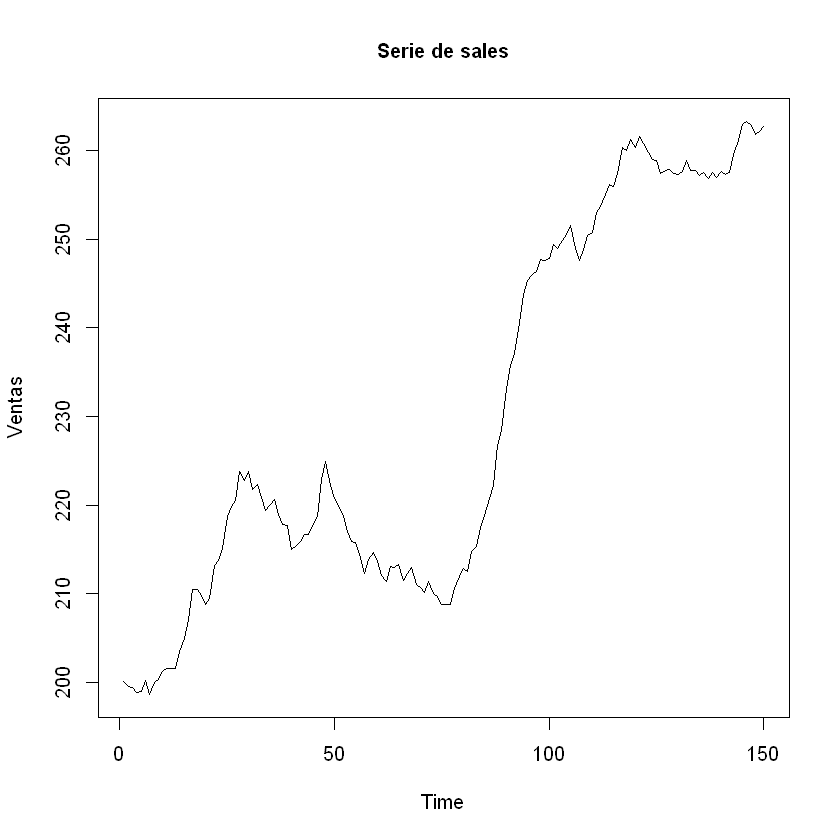

In [13]:
plot(datax, main="Serie de sales",cex.main=1,ylab="Ventas")



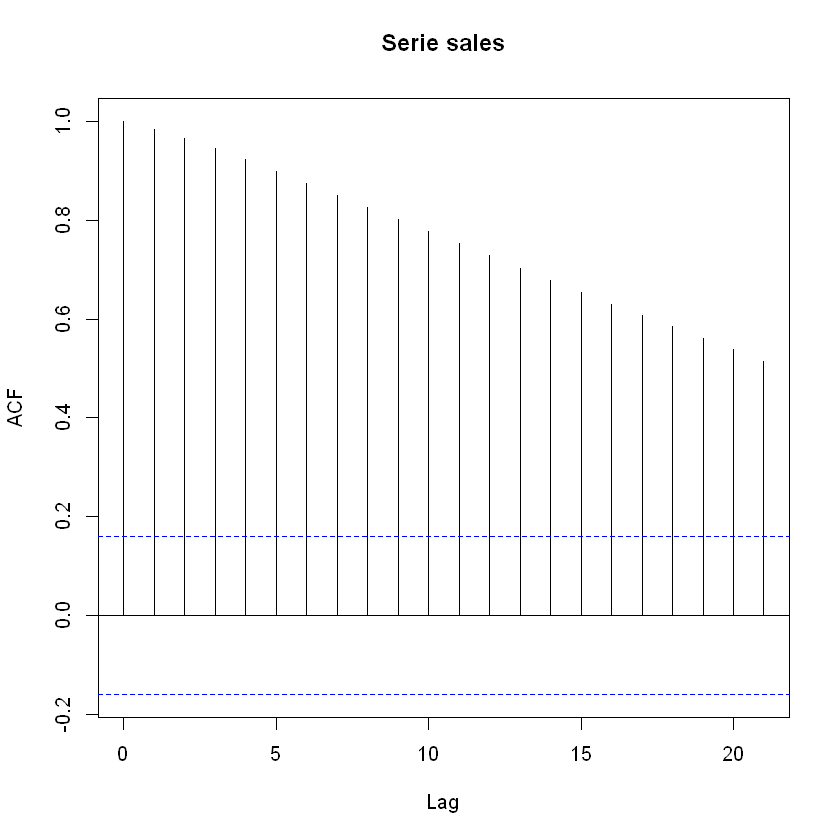

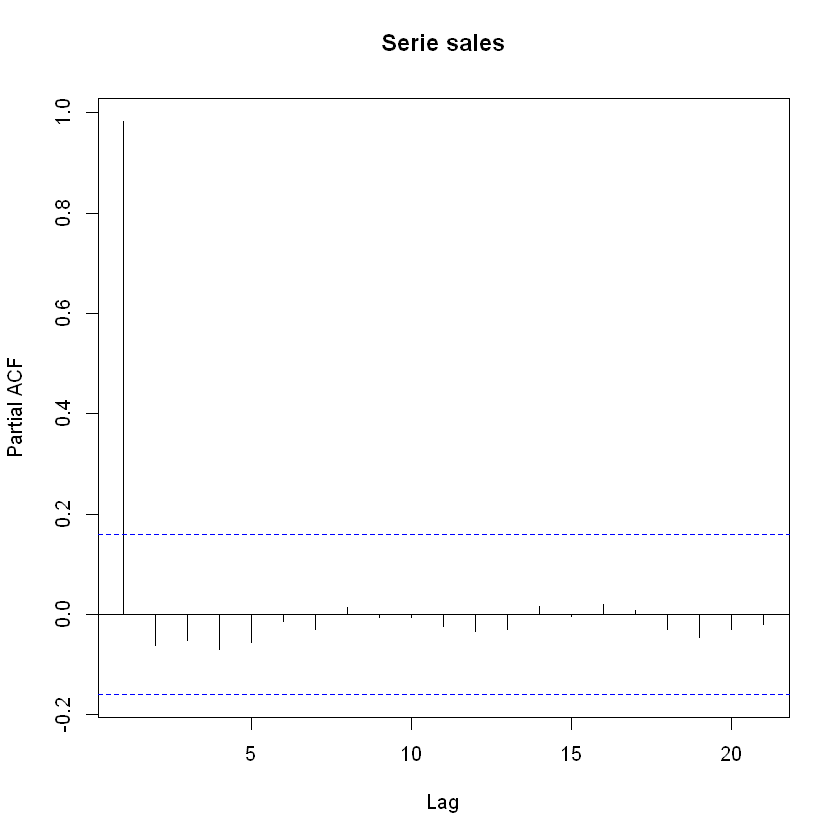

In [11]:
acf(datax, main="Serie sales")
pacf(datax, main="Serie sales")


### Proponiendo un modelo GARCH

In [24]:
model1=garchFit(~ garch(1,1), data = datax, trace = FALSE)
summary(model1)

model2=garchFit(~ garch(1,0), data = datax, trace = FALSE)
summary(model2)

model3=garchFit(~ garch(3,0), data = datax, trace = FALSE)
summary(model3)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = datax, trace = FALSE) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x0000000007f45ac0>
 [data = datax]

Conditional Distribution:
 norm 

Coefficient(s):
        mu       omega      alpha1       beta1  
2.1592e+02  1.7200e+00  1.0000e+00  1.0000e-08  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     2.159e+02   5.543e-01  389.555  < 2e-16 ***
omega  1.720e+00   9.854e-01    1.745   0.0809 .  
alpha1 1.000e+00   2.431e-01    4.113 3.91e-05 ***
beta1  1.000e-08   2.011e-01    0.000   1.0000    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -576.2935    normalized:  -3.841957 

Description:
 Thu Dec 17 05:15:39 2020 by user: pily1 


Standardised Residuals Tests:
                                Statistic p-Value     
 Jarque-Bera Test   R    Chi^2  17.06305  0.0001971536
 Shapiro-Wilk Test  R    W    

##### Eligieno el modelo 1 con un valor de AIC de 7.73 

### Efecto ARCH

##### Analisando el modelo 1, el valor de p del test LM, obtenemos que p=0.0183169 <0.05, por lo tanto rechazamos la hipotesis. Es decir hay evidencia de efecto ARCH

### Comprobar computacionalmente que el proceso al cuadrado sigue un modelo autoregresivo

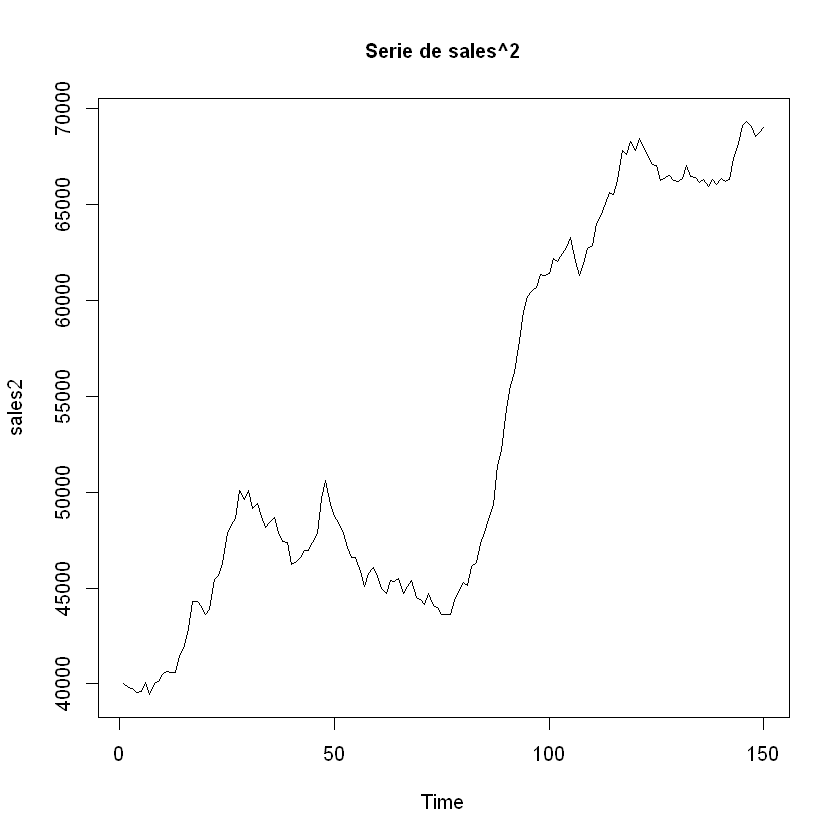

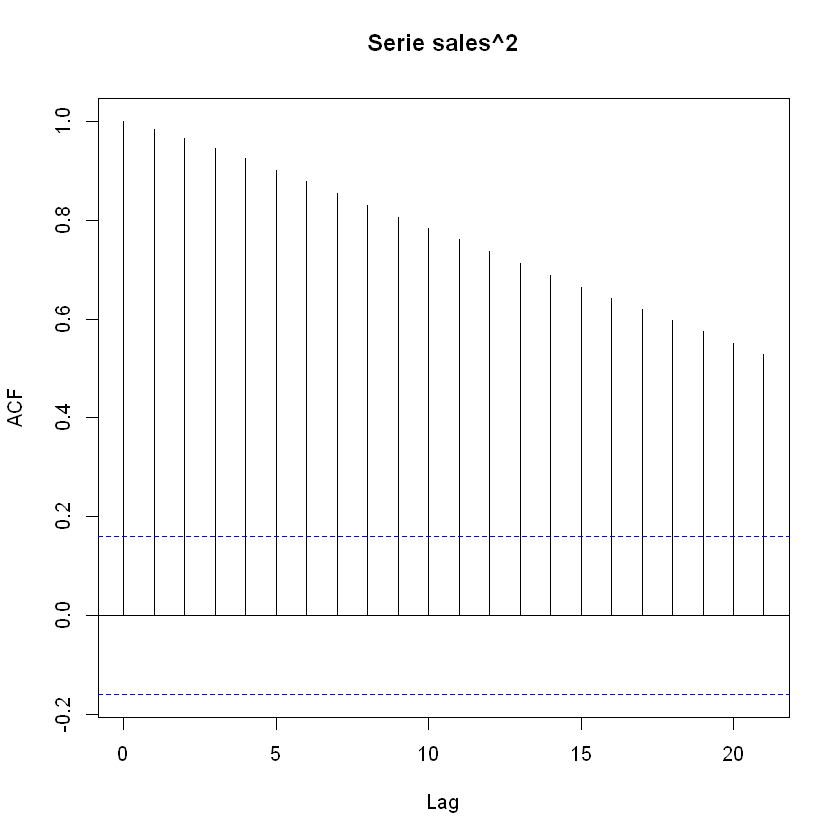

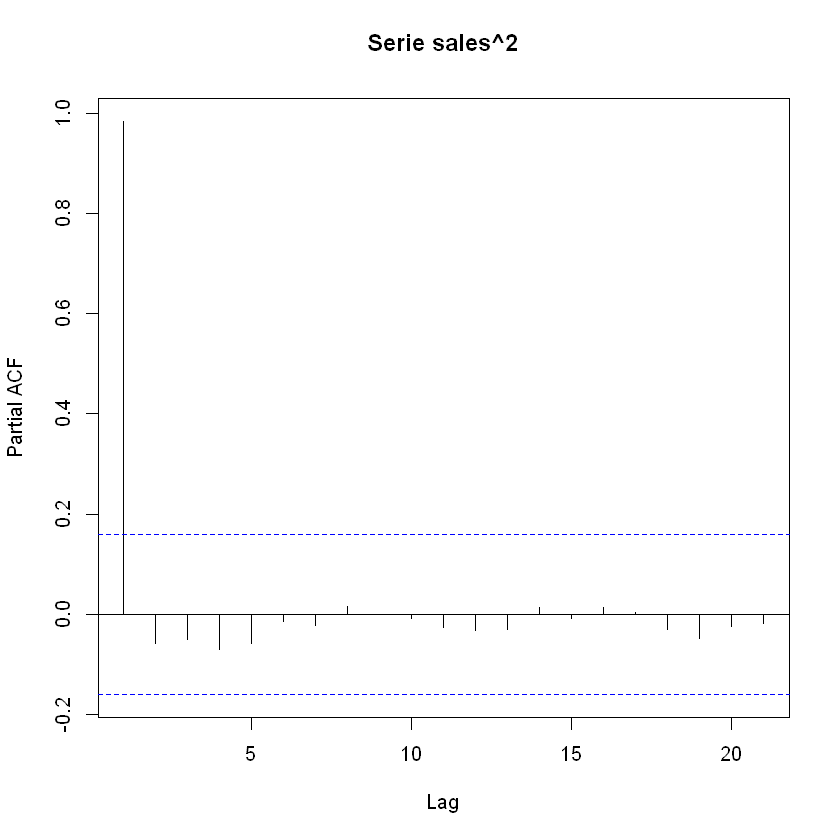

In [20]:
sales2=datax^2
plot(sales2, main="Serie de sales^2",cex.main=1)
acf(sales2, main="Serie sales^2")
pacf(sales2, main="Serie sales^2")



####  Proponiendo un AR(1)

In [23]:
Arima_1<-arima(sales2,c(1,0,0))
Arima_1


Call:
arima(x = sales2, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.9988   53884.96
s.e.  0.0017   13197.41

sigma^2 estimated as 466359:  log likelihood = -1194.8,  aic = 2395.6